### Preprocessing
- big data?
- website
- cluster?


In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Tools
Utility python scripts.

In [2]:
#plot model evaluation metrics
from plotting import *

#pre-processing pipe line functions
from pre_processing import *

#random search regression models
from regressors import *

## Datasets
Load data from disk and store as pandas dataframe.

In [3]:
#data sets
DATA_PATH = 'dataset/'
OUTPUT_PATH = 'output/'
FILE_NAME = 'crime_prep.csv'

data = pd.read_csv(DATA_PATH+FILE_NAME, header=0)
X = data.iloc[:,1:]
y = data.iloc[:,0]

#split to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#create df used for exploration
df = pd.concat((X_train, y_train),axis=1)
df_test = pd.concat((X_test, y_test),axis=1)

In [4]:
df.head()

,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,...,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126,target
482,21,NaN,NaN,Paducahcity,3,0.03,0.24,0.41,0.67,0.02,...,0.05,0.13,0.04,NaN,NaN,NaN,NaN,0.0,NaN,0.69
842,6,NaN,NaN,Newarkcity,5,0.04,0.70,0.08,0.52,0.98,...,0.04,0.23,0.19,NaN,NaN,NaN,NaN,0.0,NaN,0.33
372,55,25.0,78600.0,SunPrairiecity,2,0.01,0.48,0.01,0.98,0.03,...,0.02,0.18,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.03
576,42,41.0,44832.0,LowerAllentownship,3,0.01,0.41,0.11,0.89,0.09,...,0.03,0.12,0.06,NaN,NaN,NaN,NaN,0.0,NaN,0.04
211,54,NaN,NaN,Viennacity,2,0.00,0.31,0.01,0.99,0.03,...,0.01,0.24,0.04,NaN,NaN,NaN,NaN,0.0,NaN,0.01


In [5]:
df.describe()

,v_cont_0,v_cat_0,v_cat_1,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,...,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126,target
count,1395.000000,569.000000,566.000000,1395.000000,1395.000000,1395.000000,1395.00000,1395.000000,1395.000000,1395.000000,...,1395.000000,1395.000000,1395.000000,232.000000,232.000000,232.000000,232.000000,1395.000000,232.000000,1395.000000
mean,29.021505,56.811951,46092.568905,5.547670,0.058824,0.462674,0.18119,0.753821,0.149412,0.145398,...,0.065491,0.234882,0.160523,0.165000,0.073750,0.690043,0.443966,0.098308,0.193017,0.239806
std,16.325802,117.385297,24992.131533,2.874913,0.126493,0.163802,0.25422,0.244787,0.200142,0.235379,...,0.107911,0.202514,0.223613,0.218658,0.128929,0.224498,0.412319,0.244727,0.154747,0.233539
min,1.000000,1.000000,100.000000,1.000000,0.000000,0.030000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,9.000000,25365.000000,3.000000,0.010000,0.350000,0.02000,0.630000,0.040000,0.020000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.627500,0.000000,0.000000,0.110000,0.070000
50%,34.000000,23.000000,48055.000000,6.000000,0.020000,0.440000,0.06000,0.850000,0.070000,0.040000,...,0.040000,0.180000,0.070000,0.075000,0.030000,0.750000,0.500000,0.000000,0.150000,0.150000
75%,42.000000,61.000000,65676.000000,8.000000,0.060000,0.540000,0.24000,0.940000,0.160000,0.160000,...,0.070000,0.290000,0.190000,0.190000,0.060000,0.840000,1.000000,0.000000,0.220000,0.340000
max,56.000000,830.000000,94597.000000,10.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.990000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 482 to 684
Columns: 128 entries, v_cont_0 to target
dtypes: float64(125), int64(2), object(1)
memory usage: 1.4+ MB


## Data Exploration
Dive into data and prepare for feature selection and model selection.

In [7]:
#get all missing data
def get_missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Missing', '%'])
    return missing_data

#heatmap of all features
def show_correlation(df):
    corrmat = df.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corrmat);
    plt.show()

#target correlation matrix
def show_top_related(df, target, k):
    corrmat = df.corr()
    cols = corrmat.nlargest(k, target)[target].index
    cm = np.corrcoef(df[cols].values.T)
    plt.figure(figsize=(12,9))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    return cols

#scatterplot of most related features
def show_pair_plot(df):
    sns.set()
    sns.pairplot(df, height = 2)
    plt.show();

#histogram and normal probability plot
def show_distribution(df, target):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[target], fit=norm);
    plt.subplot(122)
    res = stats.probplot(df[target], plot=plt)
    plt.show()

#boxplot of category feature and target    
def show_cat_relation(df, cat, target):
    concat = pd.concat([df[target], df[cat]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=cat, y=target, data=concat)    
    plt.show()

#scatter plot of category feature and target    
def show_num_relation(df, num, target):
    data = pd.concat([df[target], df[num]], axis=1)
    data.plot.scatter(x=num, y=target);
    plt.show()

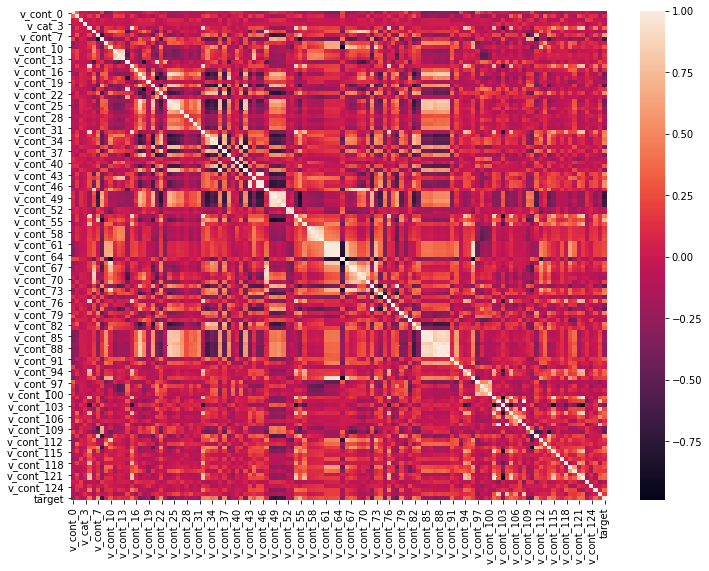

In [8]:
show_correlation(df)

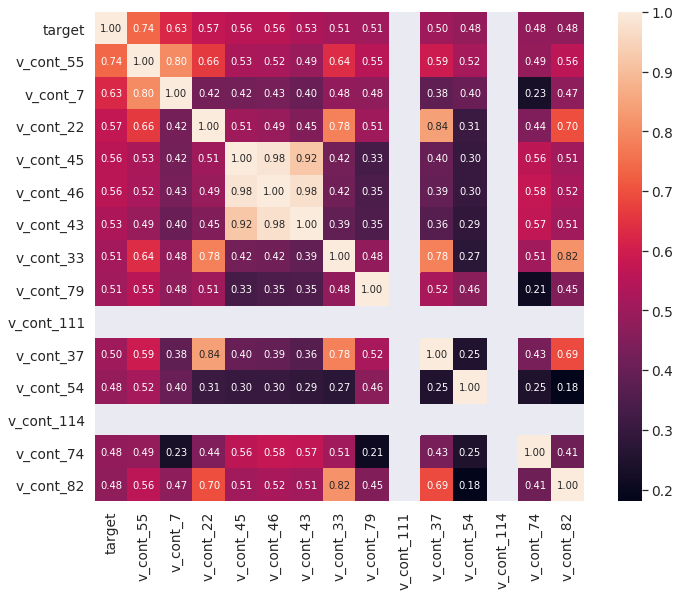

In [9]:
cols = show_top_related(df, 'target', k=15)

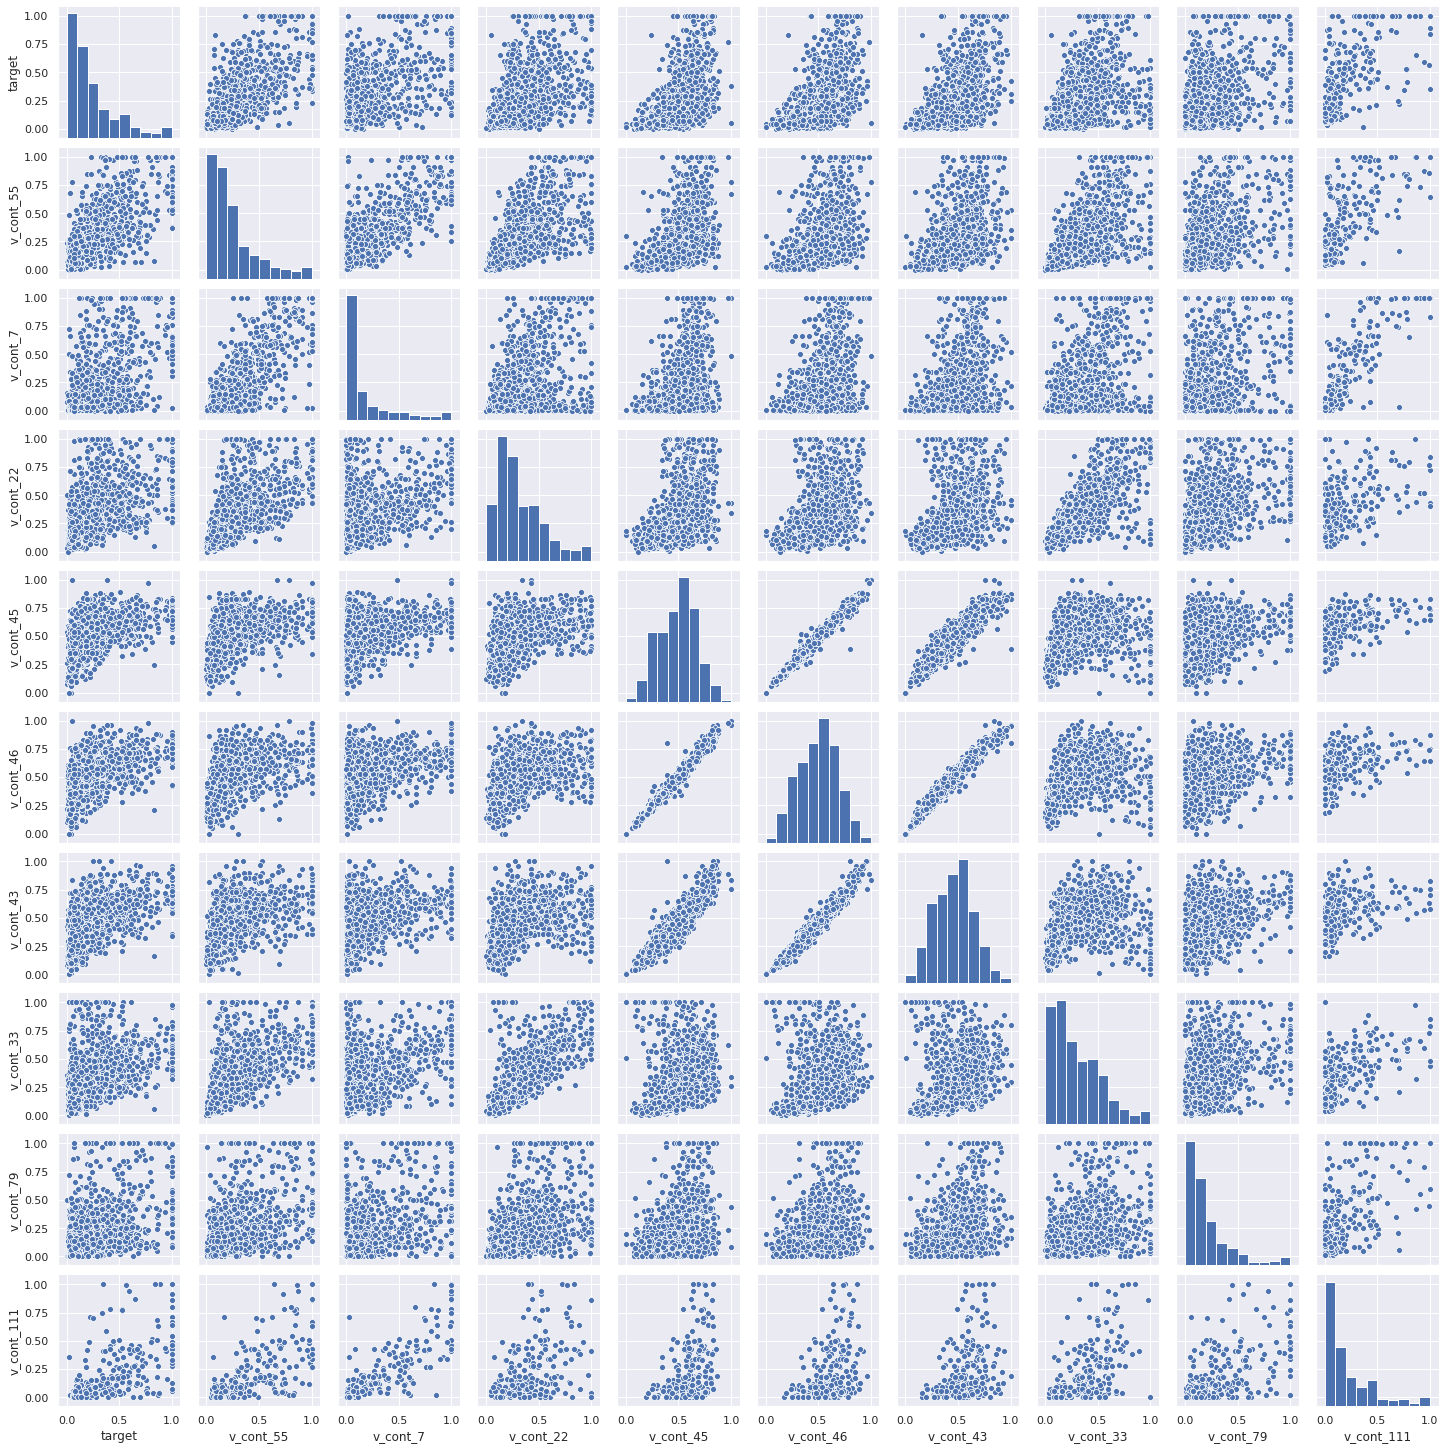

In [10]:
show_pair_plot(df[cols[:10]])

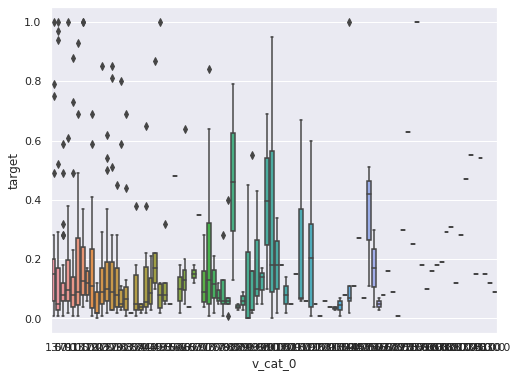

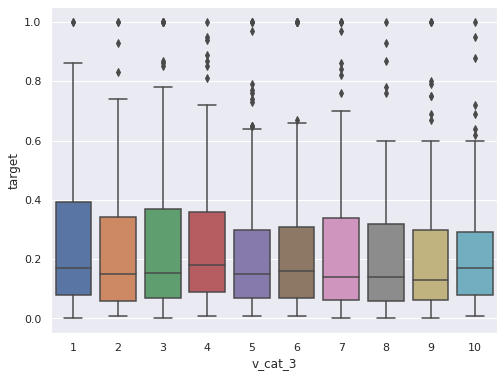

In [11]:
show_cat_relation(df, 'v_cat_0', 'target')
show_cat_relation(df, 'v_cat_3', 'target')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


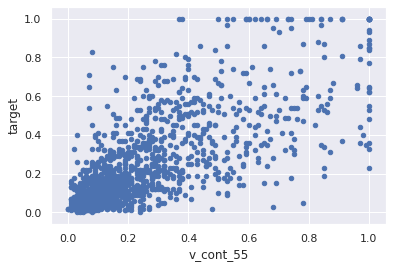

In [12]:
show_num_relation(df, 'v_cont_55', 'target')

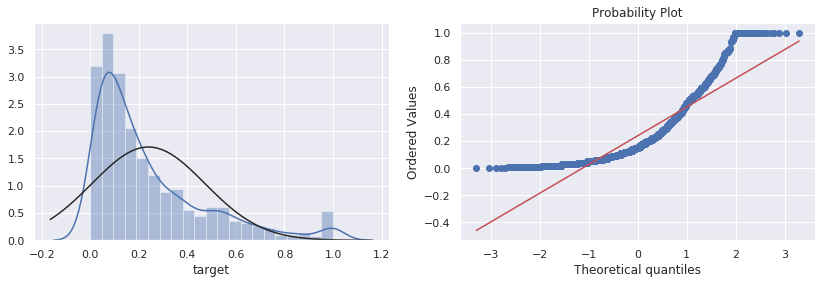

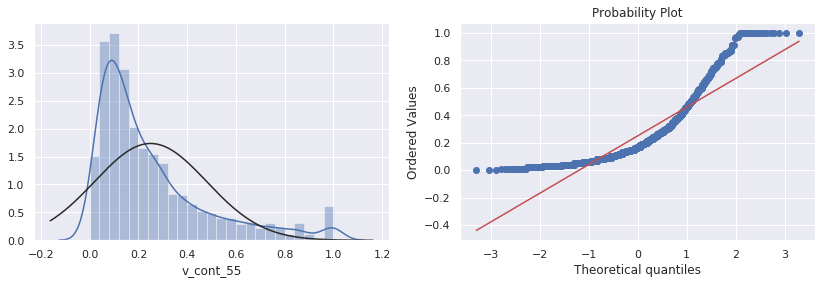

In [13]:
show_distribution(df, 'target')
show_distribution(df, 'v_cont_55')

Normalized to gaussion distribution


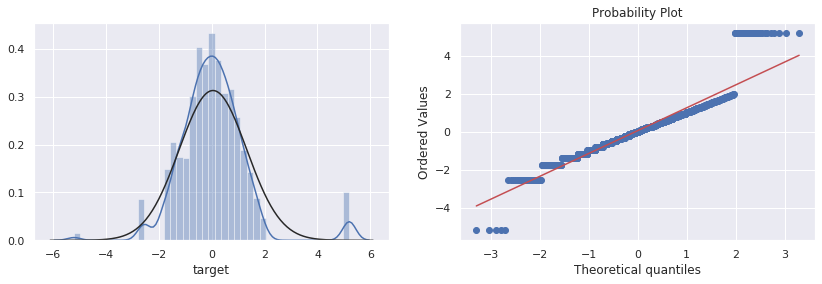

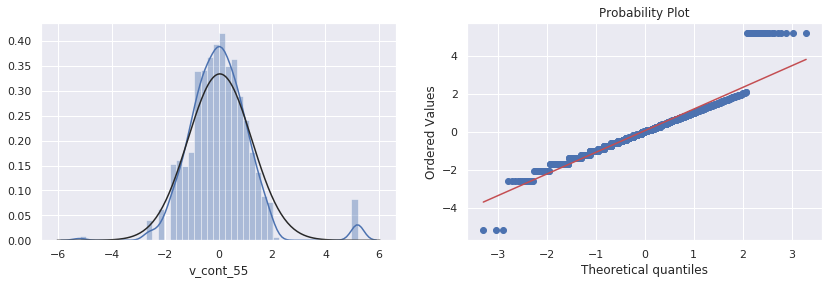

In [14]:
gau, _ = gaussion_normarlize(df[cols], df[cols])
show_distribution(gau, 'target'), show_distribution(gau, 'v_cont_55');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


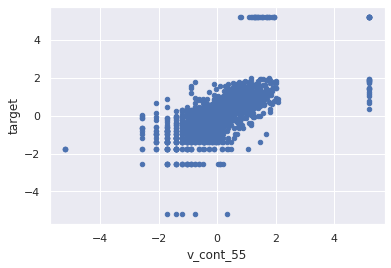

In [15]:
show_num_relation(gau, 'v_cont_55', 'target')

### missing data

In [16]:
missing_data = get_missing_data(df)
missing_data.head(30)

,Missing,%
v_cont_103,1163,0.833692
v_cont_113,1163,0.833692
v_cont_126,1163,0.833692
v_cont_101,1163,0.833692
v_cont_102,1163,0.833692
v_cont_104,1163,0.833692
v_cont_105,1163,0.833692
v_cont_106,1163,0.833692
v_cont_107,1163,0.833692
v_cont_108,1163,0.833692


## Feature Engineering
Experiments of feature selection and pre-processing methods.

In [17]:
"""
Pipeline class takes pre-processing functions and their parameters,
process the data before making predictions, store processed data and best models afterwards.
"""
class Pipeline:
    #take a dictionary with function as key and functions' parameters as value
    def __init__(self, transformers):
        self.transformers = transformers
        self.estimators = None
        self.estimators_times = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
    #make prediction and store all estimators and precessed dataset
    #see pre_processing.py, regressors.py and plotting.py
    def predict(self, x_train, y_train, x_test, y_test):
        x_train, x_test = x_train, x_test
        for trans in self.transformers:
            params = self.transformers[trans]
            if params == None:
                x_train, x_test = trans(x_train, x_test)
            else:
                x_train, x_test = trans(x_train, x_test, params)
        
        all_regrs, regr_names, regr_speed = run_all_regrs(x_train, y_train, x_test, y_test)
        mse, r2 = evaluate_regression(x_train, y_train, x_test, y_test, all_regrs, regr_names, FILE_NAME, OUTPUT_PATH)
        self.estimators = all_regrs
        self.estimators_times = regr_speed
        self.X_train = x_train
        self.X_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        

### Feature Selection
#### All Features
Keep all features when making prediction, impute missing data with 'the most frequent value'.

Encoding X features...
Imputed missing data with "most_frequent"
Standardized data with MinMaxScaler
Training SVR ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training GaussianProcess ...
Training LinearRegression ...
Training NeuralNetwork ...


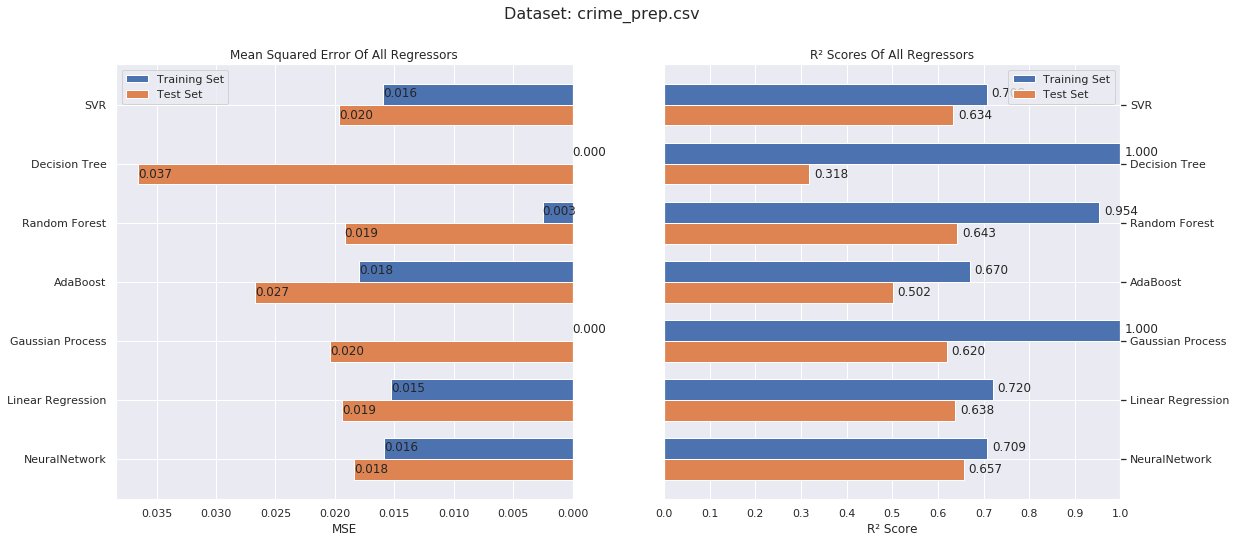

CPU times: user 36.8 s, sys: 716 ms, total: 37.5 s
Wall time: 48.3 s


In [18]:
%%time
model = Pipeline({encode_labels:preprocessing.LabelEncoder(), 
                  impute_value:'most_frequent',
                  standardize_data:preprocessing.MinMaxScaler(),
                 })
model.predict(X_train, y_train, X_test, y_test)

#### 15-Dimension/Features
Keep 15 features of X_train with PCA, drop columns with more than 80% missing data, impute with 'most_frequent' strategy.

Encoding X features...
Dropped 22 features
Imputed missing data with "most_frequent"
Standardized data with MinMaxScaler
Reduce dimension form 105 to 15
Training SVR ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training GaussianProcess ...
Training LinearRegression ...
Training NeuralNetwork ...


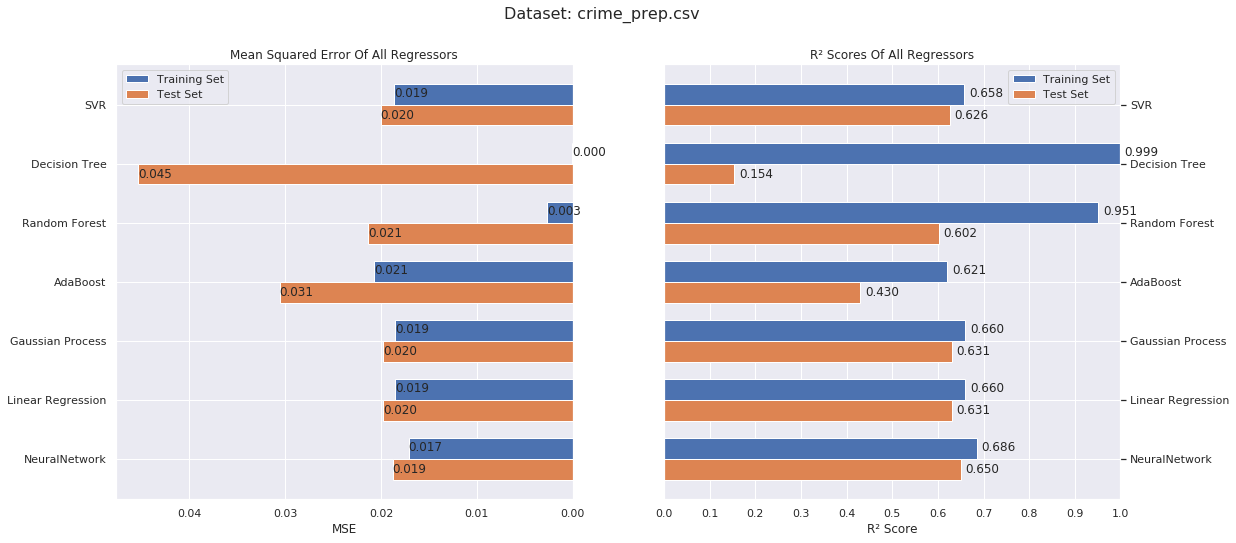

CPU times: user 15.5 s, sys: 448 ms, total: 15.9 s
Wall time: 14.9 s


In [19]:
%%time
model2 = Pipeline({encode_labels:preprocessing.LabelEncoder(),
                   drop_features:0.8,
#                    impute_value:'mean',
                   impute_value:'most_frequent',
#                    standardize_data:preprocessing.StandardScaler(),
                   standardize_data:preprocessing.MinMaxScaler(),
#                    gaussion_normarlize:None,
                   dimension_reduction:15,
                 })
model2.predict(X_train, y_train, X_test, y_test)

#### Dimension/Score Curves
Plot regression models score(R Square) w.r.t feature dimensions(from 0 to all features).

In [20]:
#plot estimator score and x_train dimensions/features
def show_dimension_score_curve(x_train, y_train, x_test, y_test, estimators):
    D = x_train.shape[1]
    est_scores = dict()
    for estimator in estimators:
        try:
            est_name = str(estimator).split('(')[0]
            train_scores = []
            test_scores = []
            for d in range(1,D+1):
                xtrain, xtest = dimension_reduction(x_train, x_test, n_components=d, verbose=False)
                est = estimator.fit(xtrain, y_train)
                train_scores.append(est.score(xtrain, y_train))
                test_scores.append(est.score(xtest, y_test))
            est_scores[est_name] = (train_scores, test_scores)
        except:
            pass
        
    color_map = plt.cm.get_cmap('tab10')
    colors = color_map(np.arange(len(est_scores)))
    plt.figure(figsize=(8,6))
    plt.title('Dimension/Score Curves')
    plt.xlim(1,D)
    plt.xlabel('Dimension of X')
    plt.ylabel('R Square Score')
    handles = []
    for est,color in zip(est_scores,colors):
        l1, = plt.plot(np.arange(1,D+1), est_scores[est][0], color=color )
        l2, = plt.plot(np.arange(1,D+1), est_scores[est][1], '--', color=color)
        handles.append([l1,l2])
    legend1 = plt.legend(handles[1], ["Train", "Test"], loc=2)
    plt.legend([h[0] for h in handles], est_scores.keys(), loc=4)
    plt.gca().add_artist(legend1)
    plt.show()

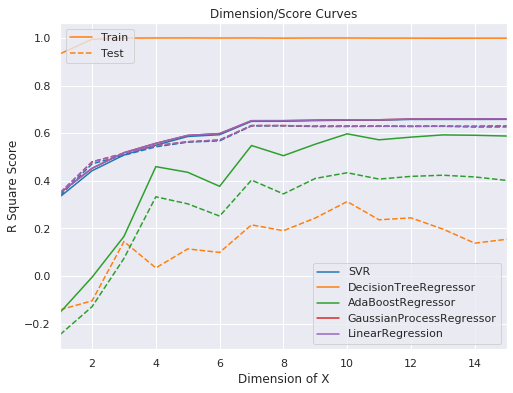

In [21]:
show_dimension_score_curve(model2.X_train, model2.y_train, model2.X_test, model2.y_test, model2.estimators)

#### Hand Selected Feature
Select features based on data exploration before(k=15), drop columns with more than 50% missing data.

Encoding X features...
Dropped 2 features
Imputed missing data with "most_frequent"
Standardized data with StandardScaler
Training SVR ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training GaussianProcess ...
Training LinearRegression ...
Training NeuralNetwork ...


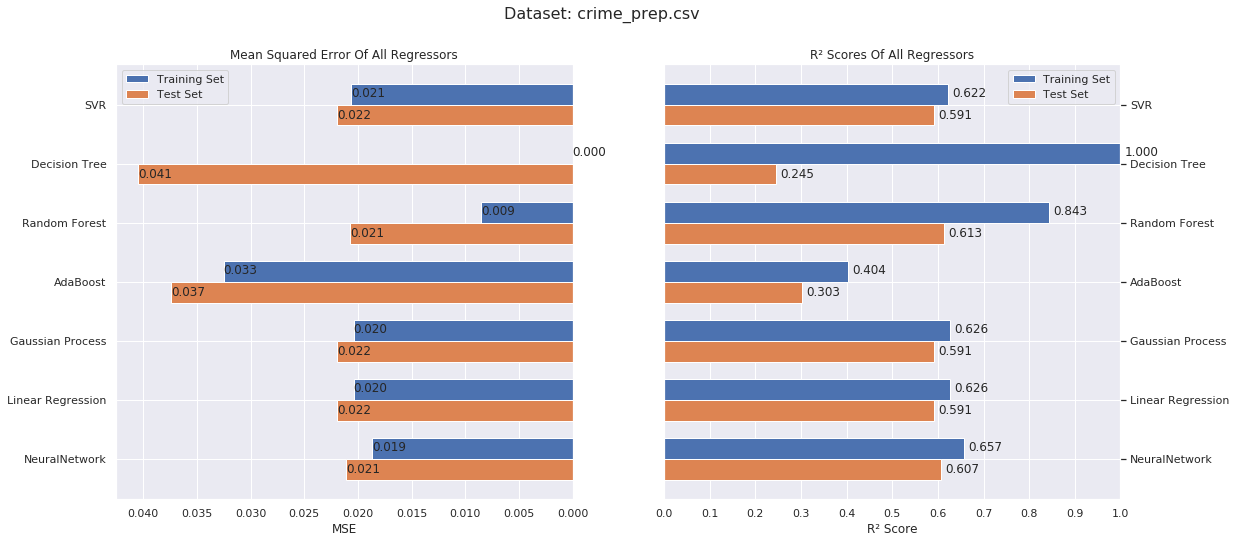

CPU times: user 12.7 s, sys: 344 ms, total: 13.1 s
Wall time: 13.7 s


In [22]:
%%time
model3 = Pipeline({encode_labels:preprocessing.LabelEncoder(),
                   drop_features:0.5,
                   impute_value:'most_frequent',
                   standardize_data:preprocessing.StandardScaler(),
#                    gaussion_normarlize:None,
                 })
model3.predict(X_train[cols[1:]], y_train, X_test[cols[1:]], y_test)

#### Gaussion Distribution
Train same model as model3 with gaussion normalization.

Encoding X features...
Dropped 2 features
Imputed missing data with "most_frequent"
Standardized data with StandardScaler
Normalized to gaussion distribution
Training SVR ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training GaussianProcess ...
Training LinearRegression ...
Training NeuralNetwork ...


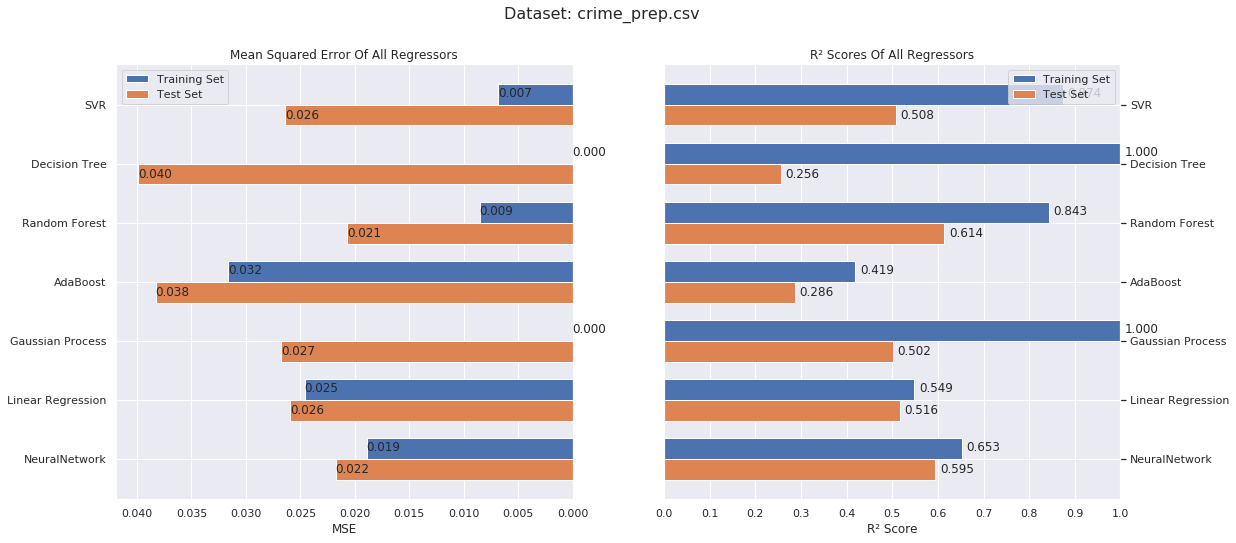

CPU times: user 11.8 s, sys: 364 ms, total: 12.2 s
Wall time: 14.5 s


In [23]:
%%time
model4 = Pipeline({encode_labels:preprocessing.LabelEncoder(),
                   drop_features:0.5,
                   impute_value:'most_frequent',
                   standardize_data:preprocessing.StandardScaler(),
                   gaussion_normarlize:None,
                 })
model4.predict(X_train[cols[1:]], y_train, X_test[cols[1:]], y_test)

### Encoding
Train a same model as previous 15-d model(model2) with different encoders.

In [24]:
import category_encoders as ce

Encoding X features...
Dropped 22 features
Imputed missing data with "most_frequent"
Standardized data with MinMaxScaler
Reduce dimension form 105 to 15
Training SVR ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training GaussianProcess ...
Training LinearRegression ...
Training NeuralNetwork ...


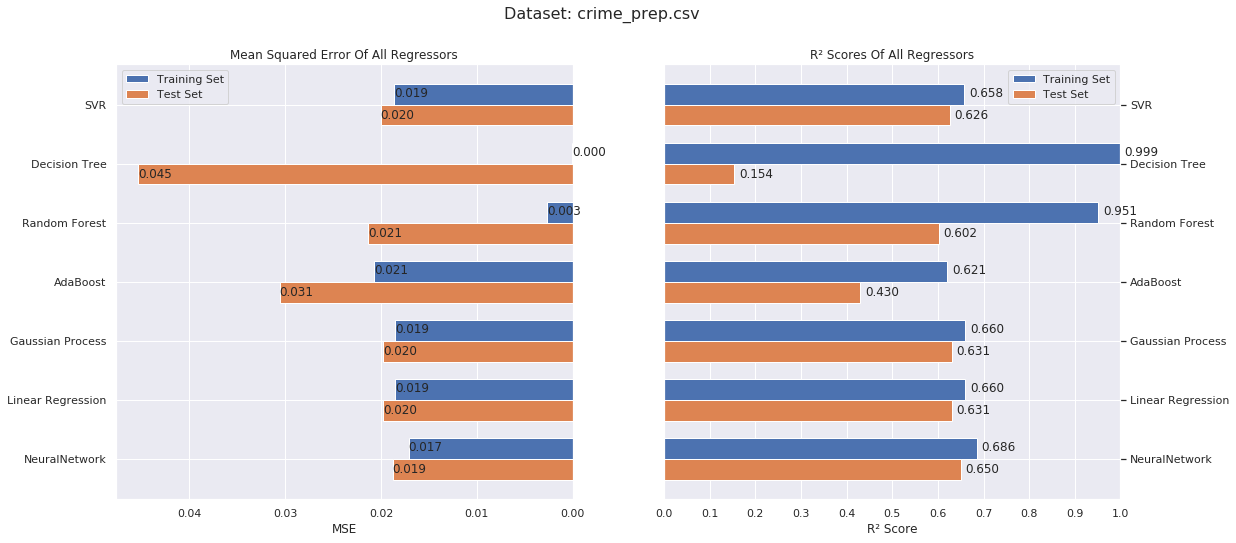

CPU times: user 15.5 s, sys: 420 ms, total: 16 s
Wall time: 14.7 s


In [25]:
%%time
model5 = Pipeline({
#                    encode_labels:preprocessing.LabelEncoder(),
                   encode_labels:ce.CountEncoder(),
#                    encode_labels:ce.TargetEncoder(),
                   drop_features:0.8,
#                    impute_value:'mean',
                   impute_value:'most_frequent',
#                    standardize_data:preprocessing.StandardScaler(),
                   standardize_data:preprocessing.MinMaxScaler(),
#                    gaussion_normarlize:None,
                   dimension_reduction:15,
                 })
model5.predict(X_train, y_train, X_test, y_test)

### Others
Combine different encoders, impputers, scalers and dimensions to do hyperparameter search: omit.

## Model Comparison

### Prediction Performance
See above figures.

### Training Time

In [26]:
def show_estimator_time(estimators, estimator_times):
    estimators_names = [str(e).split('(')[0] for e in estimators]
    N = len(estimators)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5       # the width of the bars: can also be len(x) sequence
    plt.figure(figsize=(8,6))
    plt.barh(ind, estimator_times, align='center', height=width)
    for i, v in enumerate(estimator_times):
        plt.text(v,ind[i]+0.1,'%.2f'%v)
    plt.title('Estimator Training Time')
    plt.yticks(ind, estimators_names)
    plt.xlabel('Time (s)')
    plt.gca().invert_yaxis()
    plt.show()

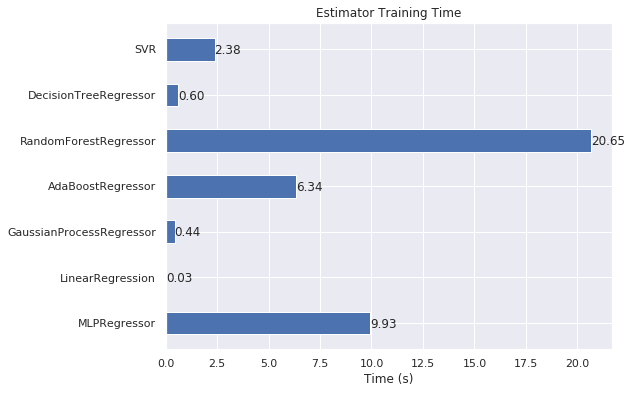

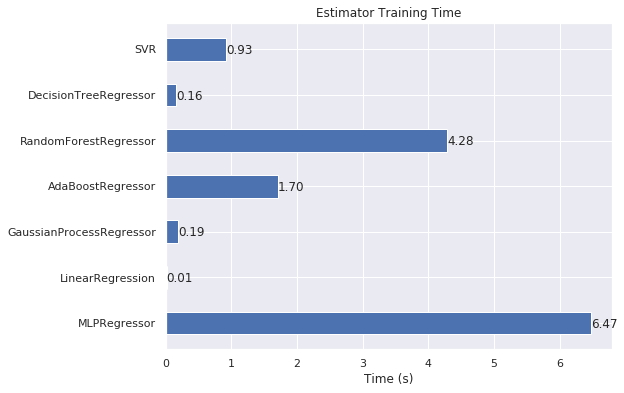

In [27]:
show_estimator_time(model.estimators, model.estimators_times)
show_estimator_time(model.estimators, model2.estimators_times)

### Memory Consumption

In [28]:
def show_memory_consumption(estimators):
    import pickle
    import sys    
    names = [str(e).split('(')[0] for e in estimators]
    memories = []
    for e in estimators:
        p = pickle.dumps(e)
        memories.append(sys.getsizeof(p)*1.0/1e+6)
        
    N = len(estimators)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5      # the width of the bars: can also be len(x) sequence
    plt.figure(figsize=(8,6))
    plt.barh(ind, memories, align='center', height=width)
    for i, v in enumerate(memories):
        plt.text(v,ind[i]+0.1,'%.3f'%v)
    plt.title('Estimator Memory Consumption')
    plt.yticks(ind, names)
    plt.xlabel('Memory (MB)')
    plt.gca().invert_yaxis()
    plt.show()        

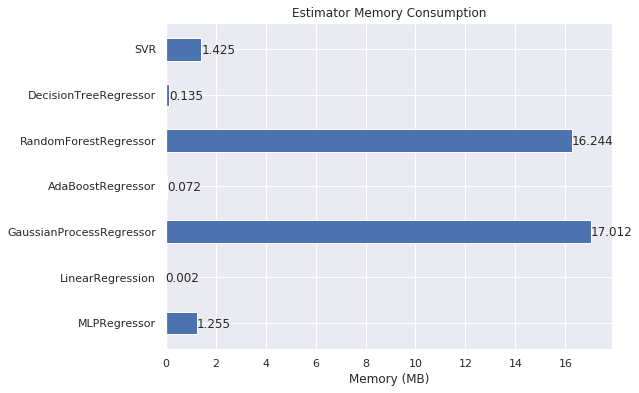

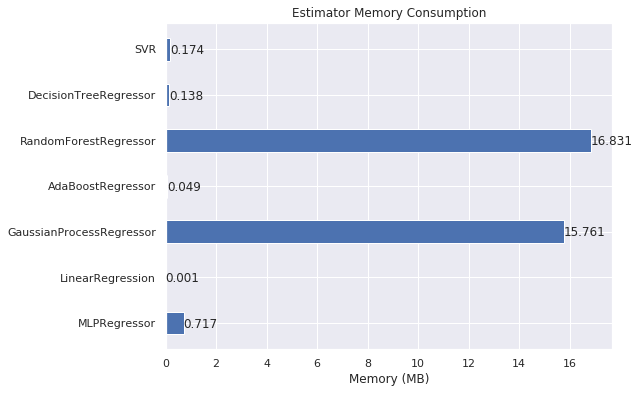

In [29]:
show_memory_consumption(model.estimators)
show_memory_consumption(model2.estimators)

### Conclusion (Occam's razor)
- LinearRegression model works the best in this dataset: high R-square value, fast training speed, low memory consumption.
- Neural Network works good, but with slow training speed and few memory overhead.
- RandomForest is very expensive with just fine result, not recommend.


## Model Explainability
Interpret trained model to solve 'black-box' problem, understand the logic behind predictions.

In [30]:
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, get_dataset, info_plots
import shap

In [31]:
#all the best regression estimators
svr = model.estimators[0]
lr = model.estimators[5]
forest = model.estimators[2]
nn = model.estimators[6]

#current estimator
estimator = forest

### Feature Importance
Use permutation importance to calculate feature importance. Randomly re-order a single important column should cause less accurate predictions.


In [32]:
def show_permutation_importance(estimator, data, target):
    perm = PermutationImportance(estimator, random_state=0).fit(data, target)
    return eli5.show_weights(perm, feature_names = data.columns.tolist())

In [33]:
show_permutation_importance(estimator, model.X_test, model.y_test)

Weight,Feature
0.1887 ± 0.0278,v_cont_55
0.1163 ± 0.0182,v_cont_49
0.0171 ± 0.0054,v_cont_48
0.0156 ± 0.0047,v_cont_8
0.0060 ± 0.0041,v_cont_0
0.0053 ± 0.0032,v_cat_1
0.0052 ± 0.0013,v_cont_73
0.0047 ± 0.0033,v_cont_95
0.0043 ± 0.0019,v_cont_7
0.0038 ± 0.0016,v_cont_43


### Partial Dependence
While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions.

In [34]:
def show_pdp(estimator, data, feature):
    pdp_target = pdp.pdp_isolate(model=estimator, dataset=data, model_features=data.columns.tolist(), feature=feature)
    pdp.pdp_plot(pdp_target, feature)
    plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


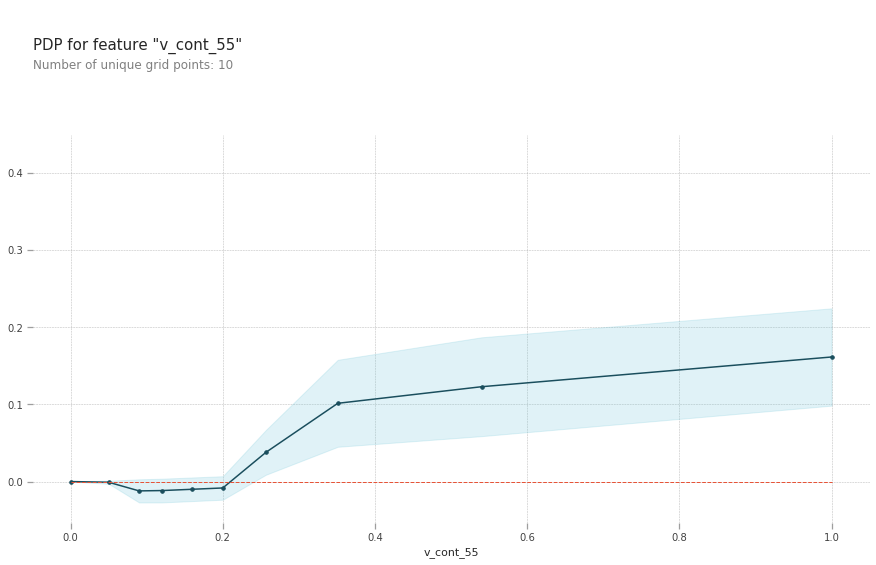

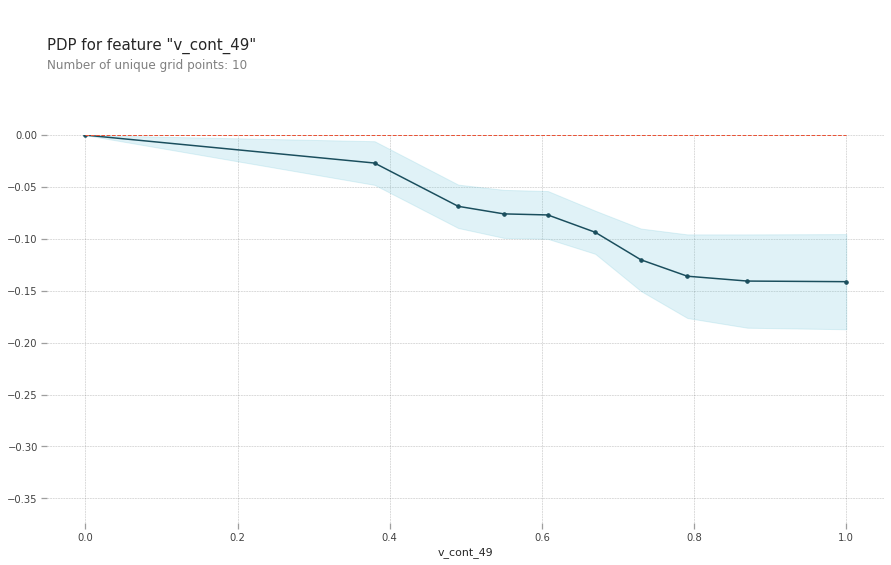

In [35]:
show_pdp(estimator, model.X_test, 'v_cont_55')
show_pdp(estimator, model.X_test, 'v_cont_49')

In [36]:
#2D Partial Dependence of two features
def show_2d_pdp(estimator, data, feature1,  feature2):
    features_to_plot = [feature1, feature2]
    inter1  =  pdp.pdp_interact(model=estimator, dataset=data, model_features=data.columns.tolist(), features=features_to_plot)
    pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')
#     pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
    plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


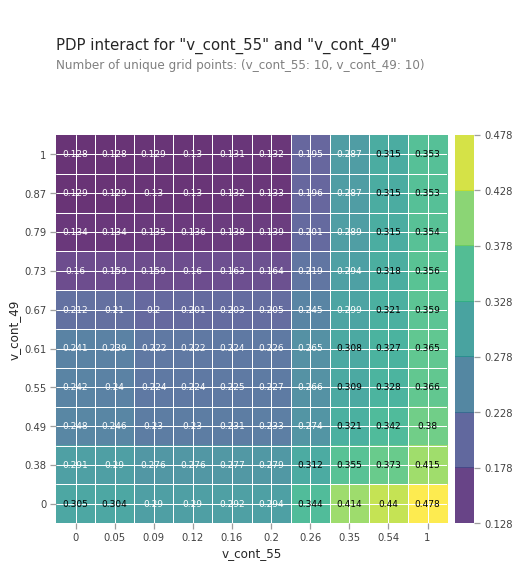

In [37]:
try:
    show_2d_pdp(estimator, model.X_test, 'v_cont_55', 'v_cont_49')
except:
    pass

### SHAP
SHAP values interpret the impact of having a certain value for a given feature in the prediction.

#### SHAP Values

In [38]:
#explain prediction for single row with shap score
def show_shap(estimator, data, row_to_show):
    data_for_prediction = data.iloc[row_to_show]
    explainer = shap.TreeExplainer(estimator)
    shap_values = explainer.shap_values(data_for_prediction)
    shap.initjs()
    return shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)    

In [39]:
row_to_predict = 5
show_shap(estimator, model.X_test, row_to_predict)

#### SHAP Summary
SHAP summary showed detailed feature importance and how these features influence prediction.

In [40]:
#show shap_values for all of X_test rather than a single row
def show_shap_summary(data):
    explainer = shap.TreeExplainer(estimator)
    shap_values = explainer.shap_values(data)
    shap.summary_plot(shap_values, data)

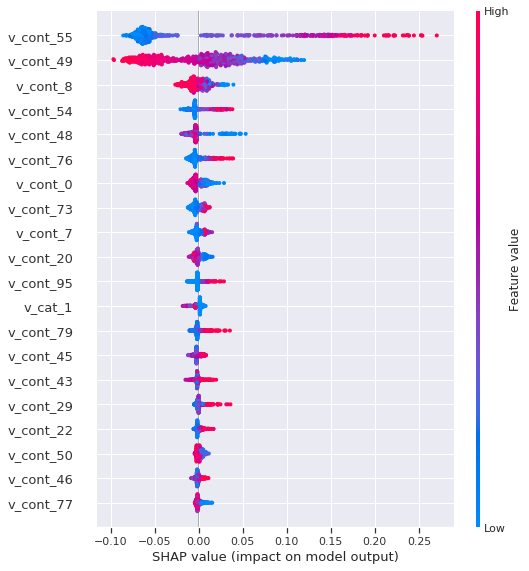

In [41]:
show_shap_summary(model.X_test)

#### SHAP Dependence Contribution
Detailed partial dependence.

In [42]:
#show shap dependence(similar to partial dependence)
def show_shap_dp(estimator, data, feature, target):
    explainer = shap.TreeExplainer(estimator)
    shap_values = explainer.shap_values(data)
    shap.dependence_plot(feature, shap_values, data, interaction_index=target)

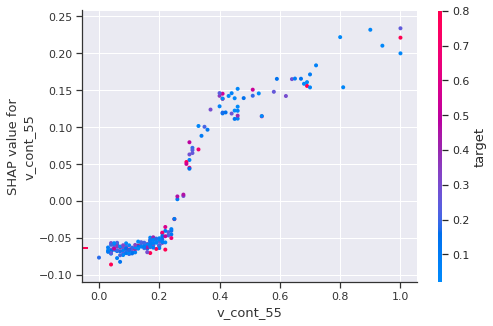

In [43]:
xy = pd.concat((model.X_test,model.y_test),axis=1)
show_shap_dp(estimator, xy, 'v_cont_55', 'target')

## Discuss
- Encoding & imputing delemma
- Use testset for feature engineering
- Evaluation metrics
- Machine learning fairness. Reference: [Counterfactual Fairness](https://arxiv.org/abs/1703.06856)
- Neural network adversarial attack. Reference: [Adversarial examples in the physical world](https://arxiv.org/abs/1607.02533)